In [27]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/New_Dataset/train'
valid_path = '/content/drive/MyDrive/New_Dataset/test'

In [4]:
resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [5]:
for layer in resnet50.layers:
    layer.trainable = False

In [6]:
folders = glob('/content/drive/MyDrive/New_Dataset/train/*')

In [7]:
folders

['/content/drive/MyDrive/New_Dataset/train/covid+',
 '/content/drive/MyDrive/New_Dataset/train/normal']

In [8]:
x = Flatten()(resnet50.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet50.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New_Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 846 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New_Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 280 images belonging to 2 classes.


In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
27/27 [==============================] - 401s 14s/step - loss: 3.3055 - accuracy: 0.5439 - val_loss: 0.2446 - val_accuracy: 0.9107
Epoch 2/10
27/27 [==============================] - 38s 1s/step - loss: 0.4571 - accuracy: 0.7826 - val_loss: 0.1506 - val_accuracy: 0.9464
Epoch 3/10
27/27 [==============================] - 38s 1s/step - loss: 0.2036 - accuracy: 0.9107 - val_loss: 0.1992 - val_accuracy: 0.9179
Epoch 4/10
27/27 [==============================] - 37s 1s/step - loss: 0.1951 - accuracy: 0.9325 - val_loss: 0.1573 - val_accuracy: 0.9429
Epoch 5/10
27/27 [==============================] - 38s 1s/step - loss: 0.1663 - accuracy: 0.9404 - val_loss: 0.0853 - val_accuracy: 0.9714
Epoch 6/10
27/27 [==============================] - 37s 1s/step - loss: 0.1504 - accuracy: 0.9383 - val_loss: 0.0843 - val_accuracy: 0.9750
Epoch 7/10
27/27 [==============================] - 38s 1s/step - loss: 0.1353 - accuracy: 0.9580 - val_loss: 0.0960 - val_accuracy: 0.9714
Epoch 8/10
27/27 [

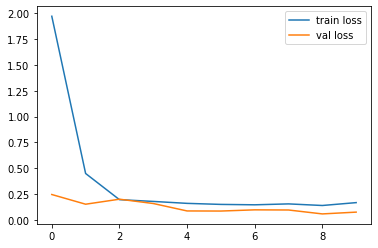

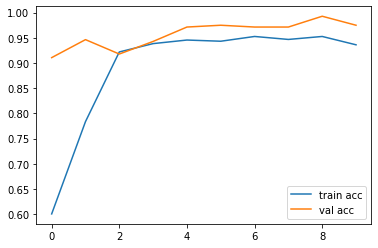

In [16]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [17]:
from tensorflow.keras.models import load_model

model.save('resnet50.h5')

In [18]:
y_pred = model.predict(test_set)
y_pred

array([[2.34090840e-03, 9.97659087e-01],
       [8.16119969e-01, 1.83880046e-01],
       [2.46907547e-02, 9.75309312e-01],
       [9.95265245e-01, 4.73479368e-03],
       [4.15777322e-03, 9.95842159e-01],
       [4.99055022e-03, 9.95009422e-01],
       [1.49823567e-02, 9.85017598e-01],
       [3.84772718e-02, 9.61522758e-01],
       [9.96538401e-01, 3.46161379e-03],
       [9.94926572e-01, 5.07342350e-03],
       [9.98540521e-01, 1.45945780e-03],
       [2.95452680e-03, 9.97045457e-01],
       [9.97723877e-01, 2.27610557e-03],
       [9.98731911e-01, 1.26806065e-03],
       [2.22487655e-02, 9.77751255e-01],
       [9.92731631e-01, 7.26840459e-03],
       [2.04785481e-01, 7.95214474e-01],
       [2.18876198e-01, 7.81123817e-01],
       [3.92002548e-04, 9.99607980e-01],
       [9.98942077e-01, 1.05798827e-03],
       [9.89250779e-01, 1.07492041e-02],
       [6.58819020e-01, 3.41181040e-01],
       [2.05829851e-02, 9.79417026e-01],
       [1.00000000e+00, 7.18263948e-10],
       [1.599764

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
model=load_model('resnet50.h5')

In [31]:
img=image.load_img('/content/drive/MyDrive/New_Dataset/test/normal/IM-0221-0001.jpeg',target_size=(224,224))

In [32]:
x=image.img_to_array(img)
x

array([[[38., 38., 38.],
        [49., 49., 49.],
        [54., 54., 54.],
        ...,
        [37., 37., 37.],
        [ 6.,  6.,  6.],
        [ 7.,  7.,  7.]],

       [[38., 38., 38.],
        [48., 48., 48.],
        [57., 57., 57.],
        ...,
        [36., 36., 36.],
        [ 3.,  3.,  3.],
        [ 7.,  7.,  7.]],

       [[37., 37., 37.],
        [49., 49., 49.],
        [53., 53., 53.],
        ...,
        [25., 25., 25.],
        [ 5.,  5.,  5.],
        [ 7.,  7.,  7.]],

       ...,

       [[21., 21., 21.],
        [19., 19., 19.],
        [17., 17., 17.],
        ...,
        [16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.]],

       [[19., 19., 19.],
        [18., 18., 18.],
        [19., 19., 19.],
        ...,
        [17., 17., 17.],
        [15., 15., 15.],
        [17., 17., 17.]],

       [[22., 22., 22.],
        [20., 20., 20.],
        [17., 17., 17.],
        ...,
        [19., 19., 19.],
        [16., 16., 16.],
        [16., 16., 16.]]

In [33]:
x.shape

(224, 224, 3)

In [34]:
x=x/255

In [35]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [36]:
model.predict(img_data)

array([[1.000000e+00, 4.322945e-13]], dtype=float32)

In [37]:
a=np.argmax(model.predict(img_data), axis=1)

In [38]:
if(a==1):
    print("Normal")
else:
    print("Covid Positive")

Covid Positive
